## <p style="text-align: center;">Water visualizations</p>
### <p style="text-align: center;">Davide Varricchio 941842</p>

Sustainable Development Goal 6: Ensure access to water and sanitation for all

First, some definitions
* Improved water source:  a source that has the potential to deliver safe water by nature of their design. They include: piped water, boreholes or tubewell, protected dug wells or springs, and packaged water. Safely managed, basic and limited are improved sources.
* Safely managed: 
    * an Improved source located on premises
    * available when needed
    * free  from contamination
* Basic: 
    * an improved source that misses a 'Safely managed' criteria 
    * under 30 minutes to collect (roundtrip)
* Limited: 
    * an improved source that misses a 'Safely managed' criteria 
    * over 30 minutes to colelct (roundtrip)
* Unimproved: water from an unprotected dug well or spring
* Surface water: water directly from river, dam, lake, pond or canal


> By 2030, achieve universal and equitable access to safe and affordable drinking water for all
> -- <cite>United Nations sdg 6.1, https://sdgs.un.org/goals/goal6</cite>

As of 2020, one in four people do not have access to safe drinking water

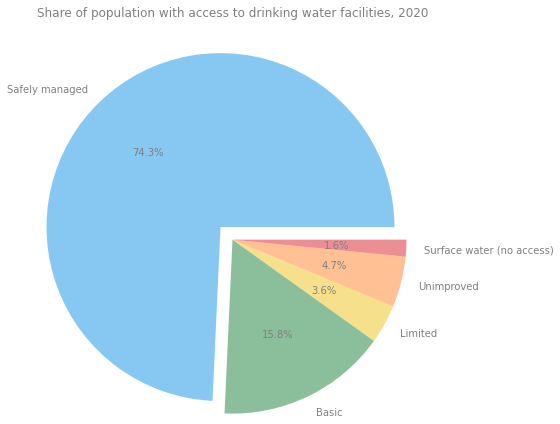

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
#plot style
plt.rcParams['text.color'] = 'grey'
plt.rcParams['axes.labelcolor'] = 'grey'
plt.rcParams['xtick.color'] = 'grey'
plt.rcParams['ytick.color'] = 'grey'
plt.rcParams['axes.edgecolor'] = 'grey'
#
wat_and_san = pd.read_csv('data/Water and Sanitation (WHO WASH, 2021).csv')
df_2020  = wat_and_san[wat_and_san['Year']== 2020]
wat_classes = ['wat_sm','wat_bas_minus_sm','wat_lim','wat_unimp','wat_sur']
drinking_wat = wat_and_san[['Entity','Year']+wat_classes]
drinking_wat_2020 = df_2020[['Entity']+wat_classes]
world_2020 = drinking_wat_2020[drinking_wat_2020['Entity'] == 'World']
sizes = world_2020.values[0][1:]
labels = ['Safely managed','Basic','Limited','Unimproved','Surface water (no access)']
explode = [0.2,0,0,0,0]
colors = ['#1192e8','#198038','#f1c21b','#ff832b','#da1e28']
p=plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',colors=colors,radius=2,textprops=dict(color='grey'))
for i in range(len(p[0])):
    p[0][i].set_alpha(0.5)
plt.title('Share of population with access to drinking water facilities, 2020',color='grey',y= 1.5)
plt.show()


Source: https://github.com/owid/owid-datasets/tree/master/datasets/Water%20and%20Sanitation%20(WHO%20WASH%2C%202021)

As expectable, not everyone in the world is in the same condition: some regions are in worse state, and there is an evident correlation with income

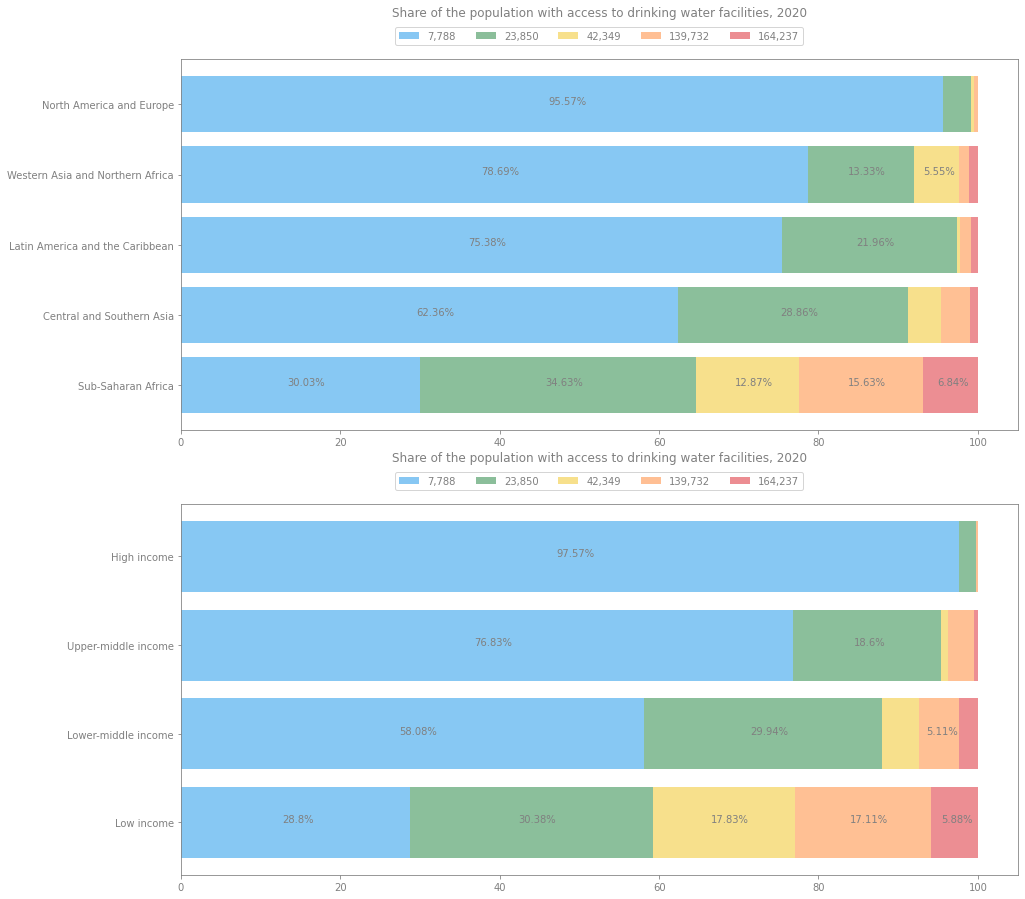

In [172]:
import numpy as np
region_filter = ['North America and Europe','Western Asia and Northern Africa','Latin America and the Caribbean','Central and Southern Asia','Sub-Saharan Africa']
income_filter = ['High income','Upper-middle income','Lower-middle income','Low income']
income = drinking_wat[drinking_wat['Entity'].isin(income_filter)].sort_values('wat_sm')
regions = drinking_wat[drinking_wat['Entity'].isin(region_filter)].sort_values('wat_sm')
income_2020 = income[income['Year'] == 2020]
regions_2020 = regions[regions['Year'] == 2020]
fig, ax = plt.subplots(2,1,figsize=(15,15))
dfs = (regions_2020,income_2020)
for j in range(2):
    df = dfs[j]
    for i in range(5):
        if i == 0:
            previous_bar = None
        if i == 1:
            previous_bar = np.array(df[wat_classes[0]])
        if i > 1:
            previous_bar += np.array(df[wat_classes[i-1]])
        b = ax[j].barh(df['Entity'].values, df[wat_classes[i]],color=colors[i], left = previous_bar,alpha=0.5,label=labels[i])
        ax[j].legend(loc='upper center',ncol=5,labelcolor='grey',bbox_to_anchor=(0.5,1.1))
        ax[j].set_title('Share of the population with access to drinking water facilities, 2020',y= 1.1)
        
        for bar in b.patches:
            width = bar.get_width()
            if width>5:
                ax[j].annotate('{}%'.format(width.round(2)),
                xy=(bar.get_x() + width/2, bar.get_y()+bar.get_height()/2),
                xytext=(-13, 0),
                textcoords="offset points",
                color='grey') 
plt.show()

https://github.com/owid/owid-datasets/tree/master/datasets/Water%20and%20Sanitation%20(WHO%20WASH%2C%202021)

In [175]:
import plotly.express as px
iso = pd.read_csv('data/access-drinking-water-stacked.csv')[['Entity','Code']].drop_duplicates()
def add_iso3_from_entity(df):
    return pd.merge(df, iso, how='inner', on = 'Entity')
drinking_wat_2020_iso = add_iso3_from_entity(drinking_wat_2020)
fig = px.choropleth(drinking_wat_2020_iso[['Code','wat_sm']],locations='Code',color="wat_sm",color_continuous_scale=px.colors.sequential.Bluyl,
title='Share of the population with access to safely managed drinking water,2020')
fig.update_layout(height=700,title_x = 0.5)

fig.show()

Source: https://github.com/owid/owid-datasets/tree/master/datasets/Water%20and%20Sanitation%20(WHO%20WASH%2C%202021)

Although income is an important determinant, the range of levels of access which occur across countries of similar prosperity further support the suggestion that there are other important governance and infrastructural factors which contribute. In the scatter plot below we can see how countries with similar GDP can have very different access to safely managed water. The differences get lower with very high income.

Correlation coefficient: 0.7235606577008413


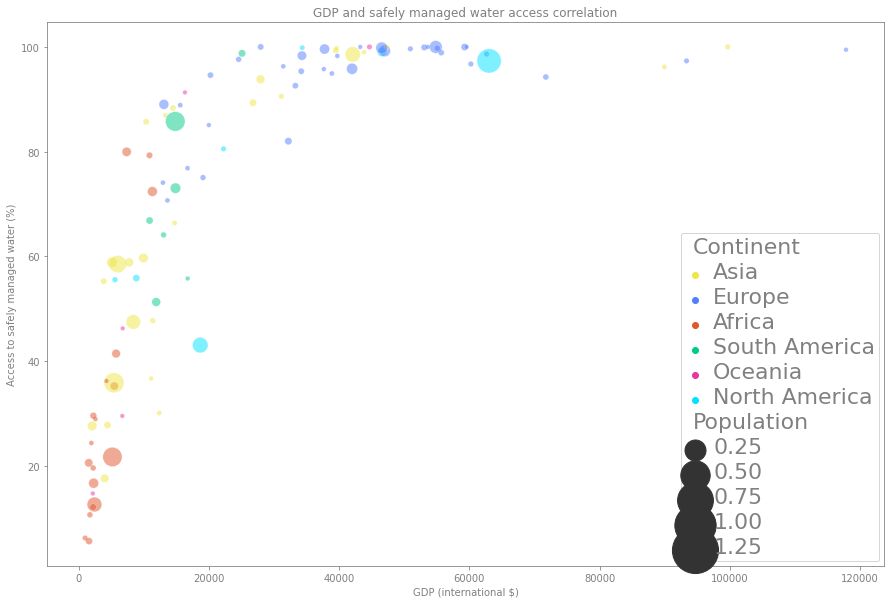

In [171]:
import pycountry
import pycountry_convert as pc
import seaborn as sns
def add_continent_from_iso3(df,iso_column):
    df['Continent'] = [pc.convert_continent_code_to_continent_name(pc.country_alpha2_to_continent_code(pc.country_alpha3_to_country_alpha2(x))) for x in df[iso_column].to_list()]
    return df 
world_bank_data_databank = pd.read_csv('data/gdp_per_capita_and_pop.csv')
population = world_bank_data_databank[world_bank_data_databank['Series Name'] == 'Population, total']
gdp = world_bank_data_databank[world_bank_data_databank['Series Name']== 'GDP per capita, PPP (current international $)']
gdp_pop_df = gdp.merge(population,on='Country Name')
gdp_pop_df.rename(columns={'Country Name':'Entity','2020 [YR2020]_x':'GDP','2020 [YR2020]_y':'Population'},inplace=True)
gdp_pop_wat = gdp_pop_df.merge(drinking_wat_2020,on='Entity')
#removing missing values
gdp_pop_wat = gdp_pop_wat[gdp_pop_wat['GDP'] != '..']
#converting types
gdp_pop_wat['GDP'] = gdp_pop_wat['GDP'].astype(float)
gdp_pop_wat['Population'] = gdp_pop_wat['Population'].astype(float)

codes = []
for country in pycountry.countries:
    codes.append(country.alpha_3)
gdp_pop_wat = gdp_pop_wat[gdp_pop_wat['Country Code_x'].isin(codes)]

add_continent_from_iso3(gdp_pop_wat,'Country Code_x')  

c_colors = {'Asia':'#efe645','Europe':'#537eff','Africa':'#e1562c','South America':'#00cb85','Oceania':'#e935a1','North America':'#00e3ff'}
scatter = sns.scatterplot(data=gdp_pop_wat, x="GDP", y="wat_sm", size="Population", hue="Continent", alpha=0.5, sizes=(20,2400),palette=c_colors)
scatter.figure.set_size_inches(15,10)
scatter.set_title('GDP and safely managed water access correlation')

plt.setp(scatter.get_legend().get_texts(), fontsize='22')
plt.setp(scatter.get_legend().get_title(), fontsize='32')
scatter.set(ylabel= 'Access to safely managed water (%)',xlabel= 'GDP (international $)')
print("Correlation coefficient: "+ str(gdp_pop_wat['GDP'].corr(gdp_pop_wat['wat_sm'])))
plt.show()



A more detailed look at lower income countries

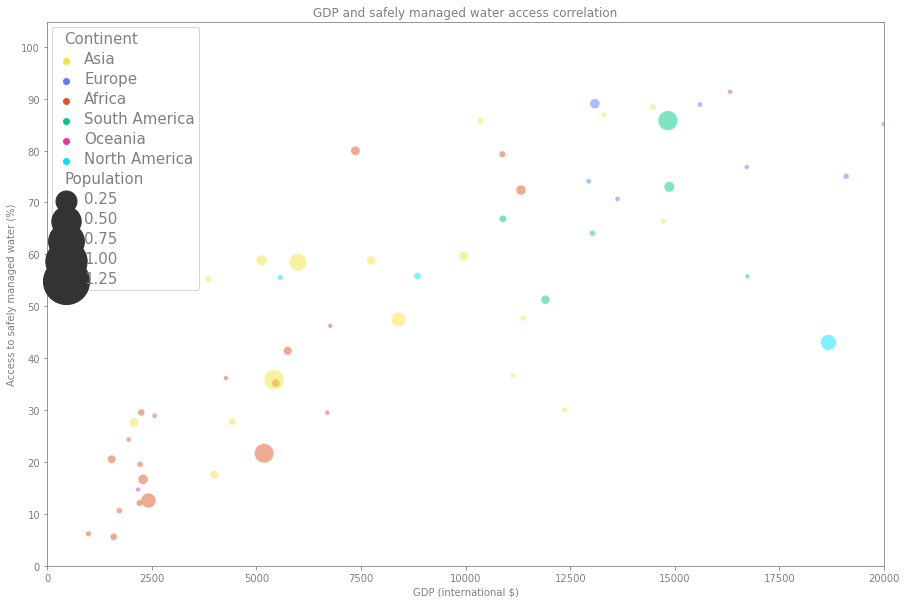

In [170]:
scatter_lim = sns.scatterplot(data=gdp_pop_wat, x="GDP", y="wat_sm", size="Population", hue="Continent", alpha=0.5, sizes=(20,2400),palette=c_colors)
scatter_lim.figure.set_size_inches(15,10)
scatter_lim.set_title('GDP and safely managed water access correlation')
scatter_lim.set_yticks(np.arange(0,101,10))
plt.setp(scatter_lim.get_legend().get_texts(), fontsize='15')
plt.setp(scatter_lim.get_legend().get_title(), fontsize='25')
scatter_lim.set(ylabel= 'Access to safely managed water (%)', xlabel= 'GDP (international $)')
scatter_lim.set_xlim(0,20000)
plt.show()

Sources:
* GDP and Population: https://datacatalog.worldbank.org/search/dataset/0037712/World-Development-Indicators
* Water: https://github.com/owid/owid-datasets/tree/master/datasets/Water%20and%20Sanitation%20(WHO%20WASH%2C%202021) <br>
GDP per capita, PPP (current international $):This indicator provides per capita values for gross domestic product (GDP) expressed in current international dollars converted by purchasing power parity (PPP) conversion factor.   GDP is the sum of gross value added by all resident producers in the country plus any product taxes and minus any subsidies not included in the value of the products. conversion factor is a spatial price deflator and currency converter that controls for price level differences between countries

There can also be a difference in water access within the same country. The scatter plot below shows how a larger percentage of people have access to safely managed drinking water in urban areas compared to rural ones. When the dots are on the line, it means the percentages of rural and urban access are the same. In the majority of cases this doesn't happend, with the points landing above the line, thus indicating what stated above. The infrastructural challenges of developing water networks in rural areas is likely to play an important role in the situation. Also, urbanization is strongly related to economic growth, and we already enstablished a correlation with that in the plots above.

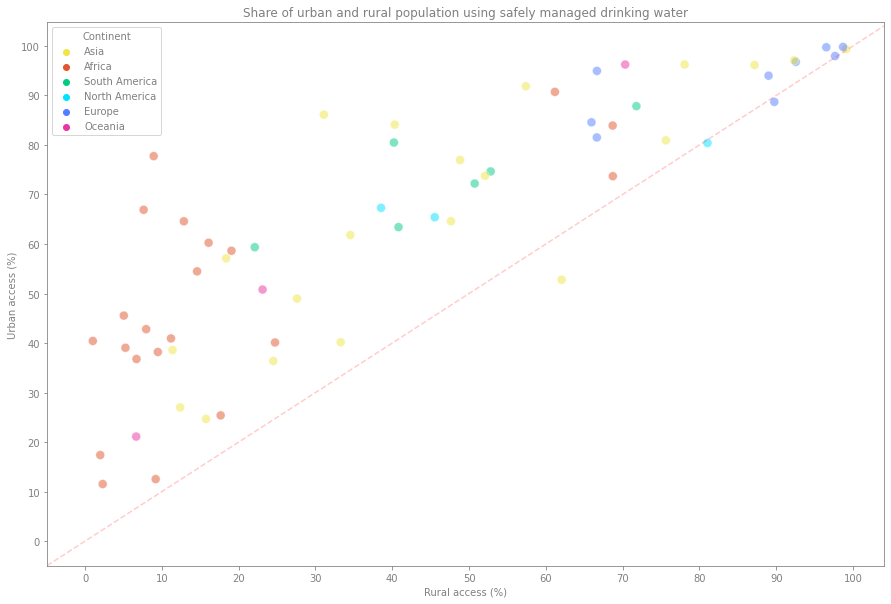

In [169]:
rural_filter = [f+'_rural' for f in wat_classes]
urban_filter = [f+'_urban' for f in wat_classes]
rural_2020 = df_2020[['Entity']+rural_filter]
rural_2020 = rural_2020[rural_2020['wat_sm_rural'].notna()]
rural_2020
urban_2020 = df_2020[['Entity']+urban_filter]
urban_2020 = urban_2020[urban_2020['wat_sm_urban'].notna()]
urban_2020
ur_ru_df = pd.merge(urban_2020,rural_2020,on='Entity')
ur_ru_df = add_iso3_from_entity(ur_ru_df)
ur_ru_df = ur_ru_df = ur_ru_df[ur_ru_df['Code'].isin(codes)]
ur_ru_df = add_continent_from_iso3(ur_ru_df,'Code')
ur_ru_scatter = sns.scatterplot(data = ur_ru_df,x = 'wat_sm_rural',y = 'wat_sm_urban',hue='Continent',palette=c_colors,alpha=0.5,s=80)
ur_ru_scatter.figure.set_size_inches(15,10)
ur_ru_scatter.set_title('Share of urban and rural population using safely managed drinking water')
ur_ru_scatter.set_yticks(np.arange(0,101,10))
ur_ru_scatter.set_xticks(np.arange(0,101,10))
ur_ru_scatter.set(ylabel= 'Urban access (%)', xlabel= 'Rural access (%)')
plt.axline([0,0],[1,1] , color='r',alpha = 0.2,linestyle='--')
plt.show()

Source: https://github.com/owid/owid-datasets/tree/master/datasets/Water%20and%20Sanitation%20(WHO%20WASH%2C%202021)

While the world has made progress in the last five years, this has been very slow. In 2015, when SDG started, only 70% of the population had safe drinking water. That means we've seen an increment of 4 percentage points over five years. At this rate we would only reach 82% by 2030. If we want to reach the target we have to more than triple the increment

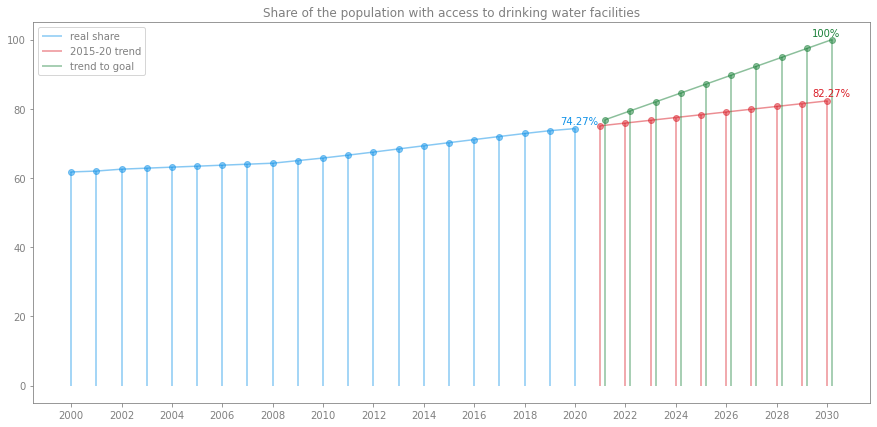

In [168]:

world = drinking_wat[drinking_wat['Entity'] == 'World']
years = np.arange(2000,2031,2)
world_2020_sm = world_2020['wat_sm'].values[0]
expected_years = np.arange(2021,2031,1)
goal_years = np.arange(2021.2,2031,1)
fig, ax = plt.subplots(figsize= (15,7))
def wat_access_trend(ax,sm_2020,year_increment,wat_years,wat_sm,title):
    expected = np.arange(sm_2020,sm_2020+(year_increment*11),year_increment)[1:]
    goal = np.linspace(sm_2020,100,num=11)[1:]
    r = ax.vlines(wat_years,0,wat_sm,colors=colors[0],alpha = 0.5,label='real share')
    ax.plot(wat_years,wat_sm,marker = 'o',color=colors[0],alpha = 0.5,linestyle='solid')
    ax.set_xticks(years)
    ax.vlines(expected_years,0,expected,colors=colors[-1],alpha = 0.5,label='2015-20 trend')
    ax.plot(expected_years,expected,marker = 'o',color=colors[-1],alpha = 0.5,linestyle='solid')
    ax.vlines(goal_years,0,goal,colors=colors[1],alpha = 0.5,label='trend to goal')
    ax.plot(goal_years,goal,marker = 'o',color=colors[1],alpha = 0.5,linestyle='solid')
    ax.legend()
    ax.annotate(f'{sm_2020}%',(2020,sm_2020),color = colors[0],
    xytext=(-15, 5),
    textcoords="offset points"
    )
    ax.annotate(f'{expected[-1].round(2)}%',(2030,expected[-1]),color = colors[-1],
    xytext=(-15, 5),
    textcoords="offset points",
    )
    ax.annotate(f'100%',(2030,goal[-1]),color = colors[1],
    xytext=(-15, 3),
    textcoords="offset points",
    )


    ax.set_title(title)
 
wat_access_trend(ax,world_2020_sm,0.8,world['Year'],world['wat_sm'],'Share of the population with access to drinking water facilities')

Source:  https://github.com/owid/owid-datasets/tree/master/datasets/Water%20and%20Sanitation%20(WHO%20WASH%2C%202021)

### How bad is it?
Unsafe water is one of the majors risk factors causing death worldwide. Besides, lack of access to safe water leads to malnutrition and poor sanitation, the latter is a leading risk factor for infectious diseases. 

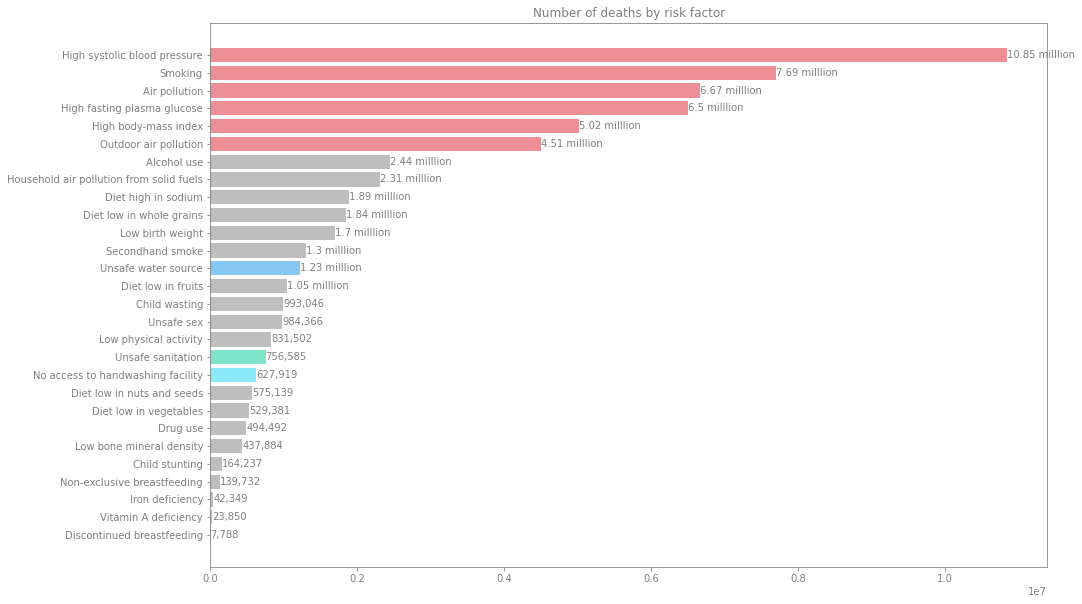

In [176]:
import re
deaths_by_risk = pd.read_csv('data/number-of-deaths-by-risk-factor.csv')
col = ['Entity','Code','Year']
#cleaning column names
for column in deaths_by_risk:
    if(column not in col):
        risk = re.search('Risk: .+?(?= -)',column).group(0)
        risk = risk.replace('Risk: ','')
        col.append(risk)

deaths_by_risk.columns = col
deaths_by_risk_2019 = deaths_by_risk[deaths_by_risk['Year'] == 2019]
deaths_by_risk_2019_world = deaths_by_risk_2019[deaths_by_risk_2019['Entity'] == 'World'] 
deaths_by_risk_2019_world = deaths_by_risk_2019_world.iloc[: ,3:]

deaths_by_risk_2019_world = deaths_by_risk_2019_world.transpose()
deaths_by_risk_2019_world.rename(columns={6629:'Deaths'},inplace=True)
deaths_by_risk_2019_world.sort_values(by='Deaths',inplace=True)
d_colors = ['#da1e28','#1192e8','#00cc96','#19d3f3']
bar_colors = ['#7f7f7f' for c in range(deaths_by_risk_2019_world.index.size)]
bar_colors[len(bar_colors)-6:] = [d_colors[0] for i in range(6)]
bar_colors[-13] = d_colors[1]
bar_colors[-18] = d_colors[2]
bar_colors[-19] = d_colors[3]
fig, ax  = plt.subplots(figsize = (15,10))
bars = ax.barh(y = deaths_by_risk_2019_world.index,width= deaths_by_risk_2019_world['Deaths'],color=bar_colors,alpha = 0.5)
labels = [str(round(n/1000000,2)) +' milllion' if n/1000000 > 1 else "{:,}".format(n) for n in deaths_by_risk_2019_world['Deaths']]
ax.bar_label(bars,labels=labels)
ax.set_title('Number of deaths by risk factor')
plt.show()

Source: https://ourworldindata.org/grapher/number-of-deaths-by-risk-factor